In [228]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [229]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [230]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [231]:
df.shape

(569, 32)

In [232]:
df.drop('id', axis=1, inplace=True)

In [233]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [234]:
df.shape

(569, 31)

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [237]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)

In [238]:
y_train.head()

560    B
428    B
198    M
203    M
41     M
Name: diagnosis, dtype: object

In [239]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.013690,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.10300,0.06219,0.04580,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.13220,0.56010,0.38650,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.22260,0.52090,0.46460,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.21230,0.09861,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592


In [240]:
# Scale the data before feeding in KNN

In [241]:
from sklearn.preprocessing import StandardScaler

In [242]:
scaler=StandardScaler()

In [243]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
kk=KNeighborsClassifier(n_neighbors=5)

In [246]:
kk.fit(X_train, y_train)

KNeighborsClassifier()

In [247]:
y_pred=kk.predict(X_test)

In [248]:
from sklearn.metrics import accuracy_score

In [249]:
accuracy_score(y_test, y_pred)

0.9736842105263158

Choosing the value of K

In [250]:
#avoid k from being even

In [251]:
scores=[]

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

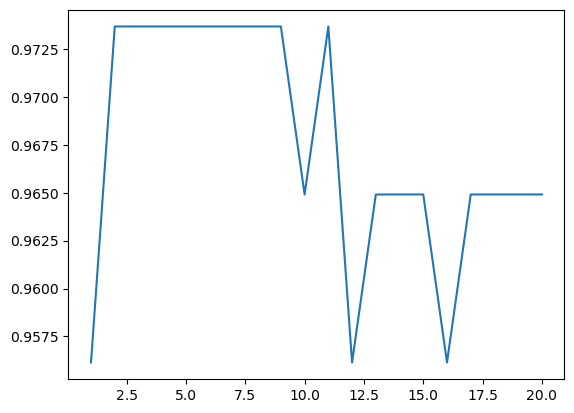

In [252]:
import matplotlib.pyplot as plt
plt.plot(range(1, 21), scores)